In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
perm = pd.read_excel("perm_23_q4.xlsx")

In [4]:
list(perm.columns)

['CASE_NUMBER',
 'CASE_STATUS',
 'RECEIVED_DATE',
 'DECISION_DATE',
 'REFILE',
 'ORIG_FILE_DATE',
 'PREVIOUS_SWA_CASE_NUMBER_STATE',
 'SCHD_A_SHEEPHERDER',
 'EMPLOYER_NAME',
 'EMPLOYER_ADDRESS_1',
 'EMPLOYER_ADDRESS_2',
 'EMPLOYER_CITY',
 'EMPLOYER_STATE_PROVINCE',
 'EMPLOYER_COUNTRY',
 'EMPLOYER_POSTAL_CODE',
 'EMPLOYER_PHONE',
 'EMPLOYER_PHONE_EXT',
 'EMPLOYER_NUM_EMPLOYEES',
 'EMPLOYER_YEAR_COMMENCED_BUSINESS',
 'NAICS_CODE',
 'FW_OWNERSHIP_INTEREST',
 'EMP_CONTACT_NAME',
 'EMP_CONTACT_ADDRESS_1',
 'EMP_CONTACT_ADDRESS_2',
 'EMP_CONTACT_CITY',
 'EMP_CONTACT_STATE_PROVINCE',
 'EMP_CONTACT_COUNTRY',
 'EMP_CONTACT_POSTAL_CODE',
 'EMP_CONTACT_PHONE',
 'EMP_CONTACT_EMAIL',
 'AGENT_ATTORNEY_NAME',
 'AGENT_ATTORNEY_FIRM_NAME',
 'AGENT_ATTORNEY_PHONE',
 'AGENT_ATTORNEY_PHONE_EXT',
 'AGENT_ATTORNEY_ADDRESS_1',
 'AGENT_ATTORNEY_ADDRESS_2',
 'AGENT_ATTORNEY_CITY',
 'AGENT_ATTORNEY_STATE_PROVINCE',
 'AGENT_ATTORNEY_COUNTRY',
 'AGENT_ATTORNEY_POSTAL_CODE',
 'AGENT_ATTORNEY_EMAIL',
 'PW_TRACK_NUM

## Dropping irrelevant columns

In [6]:
relevant_cols = ['CASE_NUMBER','CASE_STATUS','REFILE','ORIG_FILE_DATE','EMPLOYER_NAME','EMPLOYER_STATE_PROVINCE','EMPLOYER_NUM_EMPLOYEES','EMPLOYER_YEAR_COMMENCED_BUSINESS',
'NAICS_CODE','MINIMUM_EDUCATION','MAJOR_FIELD_OF_STUDY','REQUIRED_TRAINING','PW_WAGE','REQUIRED_TRAINING_MONTHS','REQUIRED_EXPERIENCE','REQUIRED_EXPERIENCE_MONTHS','COUNTRY_OF_CITIZENSHIP','FOREIGN_WORKER_INFO_MAJOR','FOREIGN_WORKER_CURR_EMPLOYED']



In [7]:
df_perm = perm[relevant_cols]

## Dealing with null values 

In [8]:
df_perm.isna().sum()

CASE_NUMBER                              0
CASE_STATUS                              0
REFILE                                   0
ORIG_FILE_DATE                      116366
EMPLOYER_NAME                            0
EMPLOYER_STATE_PROVINCE                  0
EMPLOYER_NUM_EMPLOYEES                   4
EMPLOYER_YEAR_COMMENCED_BUSINESS        29
NAICS_CODE                              77
MINIMUM_EDUCATION                    19965
MAJOR_FIELD_OF_STUDY                 25442
REQUIRED_TRAINING                        0
PW_WAGE                                 21
REQUIRED_TRAINING_MONTHS            115274
REQUIRED_EXPERIENCE                      0
REQUIRED_EXPERIENCE_MONTHS           55062
COUNTRY_OF_CITIZENSHIP                   6
FOREIGN_WORKER_INFO_MAJOR            19026
FOREIGN_WORKER_CURR_EMPLOYED             3
dtype: int64

In [9]:
df_perm['REQUIRED_TRAINING'].value_counts()

REQUIRED_TRAINING
N    115267
Y      1160
Name: count, dtype: int64

In [10]:
df_perm['REQUIRED_EXPERIENCE'].value_counts() 

REQUIRED_EXPERIENCE
Y    61382
N    55045
Name: count, dtype: int64

### Filling nan values for required_training_months and required_experience_months with 0

In [11]:


df_perm['REQUIRED_EXPERIENCE_MONTHS'].fillna(0,inplace=True)
df_perm['REQUIRED_TRAINING_MONTHS'].fillna(0,inplace=True);

C:\Users\thakk\AppData\Local\Temp\ipykernel_18108\11071916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perm['REQUIRED_EXPERIENCE_MONTHS'].fillna(0,inplace=True)
C:\Users\thakk\AppData\Local\Temp\ipykernel_18108\11071916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_perm['REQUIRED_TRAINING_MONTHS'].fillna(0,inplace=True);


### Dropping columns that have a lot of nulls.

In [12]:


df_perm = df_perm.dropna(subset=['MAJOR_FIELD_OF_STUDY'])

In [13]:
df_perm.isna().sum()

CASE_NUMBER                             0
CASE_STATUS                             0
REFILE                                  0
ORIG_FILE_DATE                      90948
EMPLOYER_NAME                           0
EMPLOYER_STATE_PROVINCE                 0
EMPLOYER_NUM_EMPLOYEES                  1
EMPLOYER_YEAR_COMMENCED_BUSINESS       12
NAICS_CODE                             25
MINIMUM_EDUCATION                      13
MAJOR_FIELD_OF_STUDY                    0
REQUIRED_TRAINING                       0
PW_WAGE                                 7
REQUIRED_TRAINING_MONTHS                0
REQUIRED_EXPERIENCE                     0
REQUIRED_EXPERIENCE_MONTHS              0
COUNTRY_OF_CITIZENSHIP                  2
FOREIGN_WORKER_INFO_MAJOR             583
FOREIGN_WORKER_CURR_EMPLOYED            0
dtype: int64

In [14]:
df_perm = df_perm.drop(columns=['ORIG_FILE_DATE'],axis=1)

In [15]:
df_perm = df_perm.dropna()

In [16]:
df_perm.isna().sum()

CASE_NUMBER                         0
CASE_STATUS                         0
REFILE                              0
EMPLOYER_NAME                       0
EMPLOYER_STATE_PROVINCE             0
EMPLOYER_NUM_EMPLOYEES              0
EMPLOYER_YEAR_COMMENCED_BUSINESS    0
NAICS_CODE                          0
MINIMUM_EDUCATION                   0
MAJOR_FIELD_OF_STUDY                0
REQUIRED_TRAINING                   0
PW_WAGE                             0
REQUIRED_TRAINING_MONTHS            0
REQUIRED_EXPERIENCE                 0
REQUIRED_EXPERIENCE_MONTHS          0
COUNTRY_OF_CITIZENSHIP              0
FOREIGN_WORKER_INFO_MAJOR           0
FOREIGN_WORKER_CURR_EMPLOYED        0
dtype: int64

## Feature cleaning, engineering and processing

In [17]:
df_perm['MINIMUM_EDUCATION'].value_counts()

MINIMUM_EDUCATION
Master's       44763
Bachelor's     40376
Doctorate       2351
Other           2058
Associate's      799
High School       17
Name: count, dtype: int64

In [18]:
# Converting max education column to have numerical values

def numeric_min_eduction(row):

    min_edu= row['MINIMUM_EDUCATION']

    if min_edu == "High School":
        return 0
    elif min_edu == "Associate's":
        return 1
    elif min_edu == "Other":
        return 2
    elif min_edu == "Bachelor's":
        return 3
    elif min_edu == "Master's":
        return 4
    elif min_edu == "Doctorate":
        return 5

In [20]:
df_perm['MINIMUM_EDUCATION'] = df_perm.apply(numeric_min_eduction,axis=1)

In [21]:
#instead of using the company establishment year, use company age

df_perm['EMPLOYER_YEAR_COMMENCED_BUSINESS'] = 2024.0 - df_perm['EMPLOYER_YEAR_COMMENCED_BUSINESS']

In [22]:
df_perm = df_perm.rename(columns={'EMPLOYER_YEAR_COMMENCED_BUSINESS':'EMPLOYER_AGE'})

In [23]:
df_perm

,CASE_NUMBER,CASE_STATUS,REFILE,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_NUM_EMPLOYEES,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_INFO_MAJOR,FOREIGN_WORKER_CURR_EMPLOYED
1,A-21187-12839,Certified-Expired,N,"NIKE, INC.",OREGON,35000.0,55.0,316210,4,See H.14,N,167378.0,0.0,Y,36.0,THAILAND,BUSINESS ADMINISTRATION,Y
2,A-21327-77110,Denied,N,RIVERY TECHNOLOGIES INC,NEW YORK,26.0,5.0,54199,3,"Information Systems, Computer Engineering, or ...",N,224307.0,0.0,N,0.0,ISRAEL,INFORMATION SYSTEMS ENGINEERING,Y
3,A-21342-83195,Certified-Expired,N,ESRI INC.,CALIFORNIA,4000.0,55.0,511210,4,Business Administration,N,135990.0,0.0,Y,36.0,CANADA,CIVIL ENGINEERING,Y
4,A-21349-86725,Certified-Expired,N,INGURAN LLC DBA STGENETICS,TEXAS,666.0,22.0,115210,4,Business Administration,N,179754.0,0.0,Y,60.0,UNITED KINGDOM,BUSINESS ADMINISTRATION,Y
5,A-21357-90219,Certified-Expired,N,"PEPSICO SALES, INC.",NEW YORK,114000.0,21.0,312111,3,"Marketing Analytics, Economics, Communications...",N,111405.0,0.0,Y,36.0,CHINA,MARKETING ANALYTICS AND COMMUNICATIONS,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116272,A-22172-75904,Certified,N,Kore Chiropractic and Rehab Corp.,WASHINGTON,7.0,6.0,621310,2,Chiropractic,N,59966.0,0.0,N,0.0,SOUTH KOREA,CHIROPRACTIC,Y
116273,A-22249-17370,Denied,N,Lincoln County Hospital District dba Grover C....,NEVADA,71.0,86.0,622110,3,BACHELOR'S DEGREE OR FOREIGN ACADEMIC EQUIVALE...,N,50045.0,0.0,N,0.0,PHILIPPINES,MEDICAL TECHNOLOGY,Y
116274,A-22319-57686,Certified,N,"WEST PENN ALLEGHENY HEALTH SYSTEM, INC.",PENNSYLVANIA,1700.0,25.0,621111,3,Medical Technology or a directly related field,N,52894.0,0.0,N,0.0,PHILIPPINES,MEDICAL LABORATORY SCIENCE,Y
116368,A-22175-78160,Certified,N,Toboggan Inc.,CALIFORNIA,6.0,13.0,51119,1,Accounting or Economics,N,42619.0,0.0,N,0.0,JAPAN,ECONOMICS,Y


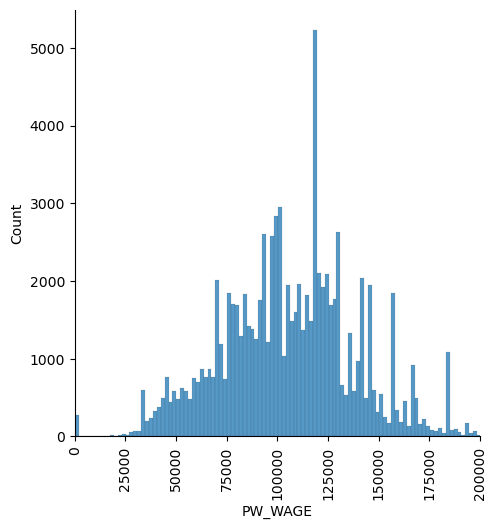

In [25]:
# the wage values are very varying from each other, let's see how can we make categories out of them

sns.displot(x= 'PW_WAGE',data=df_perm)
plt.xlim(0, 200000)
plt.xticks(rotation = 90);

In [24]:
def categorize_pw(row):
    if row['PW_WAGE'] <=50000:
        return 0
    elif row['PW_WAGE'] >50000 and row['PW_WAGE'] <= 75000:
        return 1
    elif row['PW_WAGE'] >75000 and row['PW_WAGE'] <= 125000:
        return 2
    elif row['PW_WAGE'] >125000 and row['PW_WAGE']<=150000:
        return 3
    elif row['PW_WAGE'] >=150000:
        return 4

In [26]:
df_perm['PW_WAGE'] = df_perm.apply(categorize_pw,axis=1)

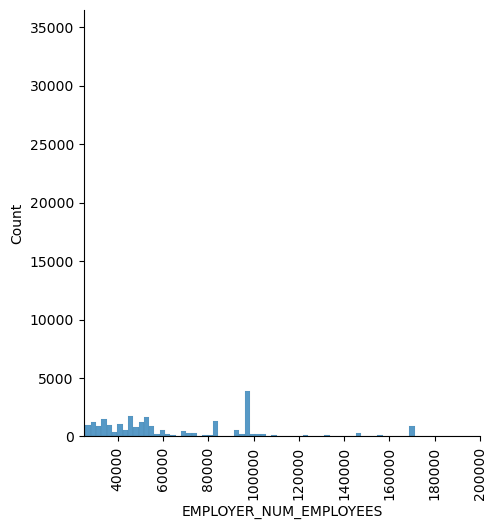

In [27]:
# Employer_num_employees is also a column with so many variations and values, let's categorize this feature
sns.displot(x= 'EMPLOYER_NUM_EMPLOYEES',data=df_perm)
plt.xlim(25000, 200000)
plt.xticks(rotation = 90);

In [28]:
def find_company_size(row):
    if row['EMPLOYER_NUM_EMPLOYEES'] <=5000:
        return 0
    elif row['EMPLOYER_NUM_EMPLOYEES'] >5000 and row['EMPLOYER_NUM_EMPLOYEES'] <= 25000:
        return 1
    elif row['EMPLOYER_NUM_EMPLOYEES'] >25000 and row['EMPLOYER_NUM_EMPLOYEES'] <= 80000:
        return 2
    elif row['EMPLOYER_NUM_EMPLOYEES'] >80000:
        return 3


In [29]:
#make a new column for company size and drop the original employer_num_employees column
df_perm['COMPANY_SIZE'] = df_perm.apply(find_company_size,axis=1)
df_perm = df_perm.drop(columns=['EMPLOYER_NUM_EMPLOYEES'])

In [117]:
df_perm

,CASE_NUMBER,CASE_STATUS,REFILE,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_INFO_MAJOR,FOREIGN_WORKER_CURR_EMPLOYED,COMPANY_SIZE
1,A-21187-12839,Certified-Expired,N,"NIKE, INC.",OREGON,55.0,316210,Master's,See H.14,N,E,0.0,Y,36.0,THAILAND,BUSINESS ADMINISTRATION,Y,LARGE
2,A-21327-77110,Denied,N,RIVERY TECHNOLOGIES INC,NEW YORK,5.0,54199,Bachelor's,"Information Systems, Computer Engineering, or ...",N,E,0.0,N,0.0,ISRAEL,INFORMATION SYSTEMS ENGINEERING,Y,SMALL
3,A-21342-83195,Certified-Expired,N,ESRI INC.,CALIFORNIA,55.0,511210,Master's,Business Administration,N,D,0.0,Y,36.0,CANADA,CIVIL ENGINEERING,Y,SMALL
4,A-21349-86725,Certified-Expired,N,INGURAN LLC DBA STGENETICS,TEXAS,22.0,115210,Master's,Business Administration,N,E,0.0,Y,60.0,UNITED KINGDOM,BUSINESS ADMINISTRATION,Y,SMALL
5,A-21357-90219,Certified-Expired,N,"PEPSICO SALES, INC.",NEW YORK,21.0,312111,Bachelor's,"Marketing Analytics, Economics, Communications...",N,C,0.0,Y,36.0,CHINA,MARKETING ANALYTICS AND COMMUNICATIONS,Y,EXTRA LARGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116272,A-22172-75904,Certified,N,Kore Chiropractic and Rehab Corp.,WASHINGTON,6.0,621310,Other,Chiropractic,N,B,0.0,N,0.0,SOUTH KOREA,CHIROPRACTIC,Y,SMALL
116273,A-22249-17370,Denied,N,Lincoln County Hospital District dba Grover C....,NEVADA,86.0,622110,Bachelor's,BACHELOR'S DEGREE OR FOREIGN ACADEMIC EQUIVALE...,N,B,0.0,N,0.0,PHILIPPINES,MEDICAL TECHNOLOGY,Y,SMALL
116274,A-22319-57686,Certified,N,"WEST PENN ALLEGHENY HEALTH SYSTEM, INC.",PENNSYLVANIA,25.0,621111,Bachelor's,Medical Technology or a directly related field,N,B,0.0,N,0.0,PHILIPPINES,MEDICAL LABORATORY SCIENCE,Y,SMALL
116368,A-22175-78160,Certified,N,Toboggan Inc.,CALIFORNIA,13.0,51119,Associate's,Accounting or Economics,N,A,0.0,N,0.0,JAPAN,ECONOMICS,Y,SMALL


In [30]:
df_perm.to_csv("df_perm_processed_1.csv")

In [31]:
df = pd.read_csv("df_perm_processed_1.csv")

In [32]:
df

,Unnamed: 0,CASE_NUMBER,CASE_STATUS,REFILE,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_INFO_MAJOR,FOREIGN_WORKER_CURR_EMPLOYED,COMPANY_SIZE
0,1,A-21187-12839,Certified-Expired,N,"NIKE, INC.",OREGON,55.0,316210,4,See H.14,N,4,0.0,Y,36.0,THAILAND,BUSINESS ADMINISTRATION,Y,2
1,2,A-21327-77110,Denied,N,RIVERY TECHNOLOGIES INC,NEW YORK,5.0,54199,3,"Information Systems, Computer Engineering, or ...",N,4,0.0,N,0.0,ISRAEL,INFORMATION SYSTEMS ENGINEERING,Y,0
2,3,A-21342-83195,Certified-Expired,N,ESRI INC.,CALIFORNIA,55.0,511210,4,Business Administration,N,3,0.0,Y,36.0,CANADA,CIVIL ENGINEERING,Y,0
3,4,A-21349-86725,Certified-Expired,N,INGURAN LLC DBA STGENETICS,TEXAS,22.0,115210,4,Business Administration,N,4,0.0,Y,60.0,UNITED KINGDOM,BUSINESS ADMINISTRATION,Y,0
4,5,A-21357-90219,Certified-Expired,N,"PEPSICO SALES, INC.",NEW YORK,21.0,312111,3,"Marketing Analytics, Economics, Communications...",N,2,0.0,Y,36.0,CHINA,MARKETING ANALYTICS AND COMMUNICATIONS,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90359,116272,A-22172-75904,Certified,N,Kore Chiropractic and Rehab Corp.,WASHINGTON,6.0,621310,2,Chiropractic,N,1,0.0,N,0.0,SOUTH KOREA,CHIROPRACTIC,Y,0
90360,116273,A-22249-17370,Denied,N,Lincoln County Hospital District dba Grover C....,NEVADA,86.0,622110,3,BACHELOR'S DEGREE OR FOREIGN ACADEMIC EQUIVALE...,N,1,0.0,N,0.0,PHILIPPINES,MEDICAL TECHNOLOGY,Y,0
90361,116274,A-22319-57686,Certified,N,"WEST PENN ALLEGHENY HEALTH SYSTEM, INC.",PENNSYLVANIA,25.0,621111,3,Medical Technology or a directly related field,N,1,0.0,N,0.0,PHILIPPINES,MEDICAL LABORATORY SCIENCE,Y,0
90362,116368,A-22175-78160,Certified,N,Toboggan Inc.,CALIFORNIA,13.0,51119,1,Accounting or Economics,N,0,0.0,N,0.0,JAPAN,ECONOMICS,Y,0


In [4]:
#THE NAICS_CODE AND EMPLOYER_NAME ESSENTIALLY HAVE SAME INFORMATION THAT IDENTIFIES THE EMPLOYER, LET'S DROP ONE OF THEM TO MAKE LIFE EASIER

df[df['EMPLOYER_NAME']=="NIKE, INC."]


,Unnamed: 0,CASE_NUMBER,CASE_STATUS,REFILE,EMPLOYER_NAME,EMPLOYER_STATE_PROVINCE,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,MAJOR_FIELD_OF_STUDY,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_INFO_MAJOR,FOREIGN_WORKER_CURR_EMPLOYED,COMPANY_SIZE
0,1,A-21187-12839,Certified-Expired,N,"NIKE, INC.",OREGON,55.0,316210,Master's,See H.14,N,E,0.0,Y,36.0,THAILAND,BUSINESS ADMINISTRATION,Y,LARGE
2208,2478,A-22265-26521,Withdrawn,N,"NIKE, INC.",OREGON,55.0,316210,Bachelor's,See H.14,N,C,0.0,Y,60.0,INDIA,ELECTRONICS ENGINEERING,Y,LARGE
2860,3260,A-21349-86933,Certified-Expired,N,"NIKE, INC.",OREGON,55.0,316210,Bachelor's,See H.14,N,D,0.0,Y,60.0,BRAZIL,PRODUCT DESIGN,Y,LARGE
2906,3307,A-21349-86924,Certified-Expired,N,"NIKE, INC.",OREGON,55.0,316210,Master's,See H.14,N,C,0.0,Y,24.0,INDIA,ELECTRONICS ENGINEERING,Y,LARGE
3902,4445,A-21356-89756,Certified-Expired,N,"NIKE, INC.",OREGON,55.0,316210,Master's,See H.14,N,E,0.0,Y,96.0,MEXICO,BUSINESS ADMINISTRATION,Y,LARGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86876,111736,A-22293-42956,Certified,N,"NIKE, INC.",OREGON,55.0,316210,Master's,See H.14,N,C,0.0,Y,24.0,INDIA,APPLIED COMPUTER SCIENCE,Y,LARGE
87084,112090,A-22242-14434,Certified,N,"NIKE, INC.",OREGON,55.0,316210,Bachelor's,See H.14,N,D,0.0,Y,60.0,MEXICO,COMPUTER SYSTEMS ADMINISTRATION,Y,LARGE
87291,112388,A-22285-38110,Certified,N,"NIKE, INC.",OREGON,55.0,316210,Bachelor's,See H.14,N,C,0.0,Y,60.0,INDIA,ENGINEERING,Y,LARGE
87606,112712,A-22270-28940,Certified,N,"NIKE, INC.",OREGON,55.0,316210,Bachelor's,See H.14,N,C,0.0,Y,60.0,INDIA,BIOTECHNOLOGY,Y,LARGE


In [33]:
df = df.drop(columns=['EMPLOYER_NAME'])

In [34]:
# for now, we do not need case number so we can drop it (also dropping the Unnamed: 0 column because i saved the dataframe with the index last time)

df = df.drop (columns=['Unnamed: 0',"CASE_NUMBER"])


In [35]:
#the EMPLOYER_STATE_PROVINCE column also has a lot of variations for one single state, lets do something about it.

list(dict(df['EMPLOYER_STATE_PROVINCE'].value_counts()).keys())

['CALIFORNIA',
 'WASHINGTON',
 'TEXAS',
 'NEW YORK',
 'NEW JERSEY',
 'ILLINOIS',
 'FLORIDA',
 'PENNSYLVANIA',
 'MASSACHUSETTS',
 'MICHIGAN',
 'GEORGIA',
 'VIRGINIA',
 'NORTH CAROLINA',
 'MINNESOTA',
 'OHIO',
 'MARYLAND',
 'ARKANSAS',
 'ARIZONA',
 'INDIANA',
 'WISCONSIN',
 'MISSOURI',
 'CONNECTICUT',
 'TENNESSEE',
 'UTAH',
 'COLORADO',
 'OREGON',
 'IOWA',
 'SOUTH CAROLINA',
 'DELAWARE',
 'RHODE ISLAND',
 'ALABAMA',
 'KENTUCKY',
 'NEBRASKA',
 'KANSAS',
 'DISTRICT OF COLUMBIA',
 'SOUTH DAKOTA',
 'MASSACHUSETTS MA',
 'LOUISIANA',
 'NEVADA',
 'MICHIGAN MI',
 'OKLAHOMA',
 'IDAHO',
 'CALIFORNIA CALIFORNIA',
 'CALIFORNIA CA',
 'NEW MEXICO',
 'TEXAS TX',
 'NEW HAMPSHIRE',
 'NEW JERSEY NEW JERSEY',
 'NEW JERSEY NJ',
 'TEXAS TEXAS',
 'NEW YORK NEW YORK',
 'NORTH DAKOTA',
 'MISSISSIPPI',
 'MAINE',
 'ILLINOIS IL',
 'GEORGIA GA',
 'NEW YORK NY',
 'WEST VIRGINIA',
 'MASSACHUSETTS MASSACHUSETTS',
 'VIRGINIA VIRGINIA',
 'HAWAII',
 'WASHINGTON WA',
 'GUAM',
 'NORTHERN MARIANA ISLANDS',
 'VERMONT',
 'TEN

In [36]:
# we will use a library called fuzzwuzzy to clean the states

In [37]:
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

In [38]:
us_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
    'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming'
]

In [39]:
def clean_state_name(name, choices):
    return process.extractOne(name, choices)[0]


In [40]:
df['EMPLOYER_STATE'] = df['EMPLOYER_STATE_PROVINCE'].apply(lambda x: clean_state_name(x, us_states))


In [41]:
#now we have cleaned states, we can drop the old column EMPLOYER_STATE_PROVINCE
df = df.drop(columns=['EMPLOYER_STATE_PROVINCE'])

#### Now, we have two more columns, MAJOR_FIELD_OF_STUDY, which is the field of study required by the employer and FOREIGN_WORKER_INFO_MAJOR which is the employees major. Instead of using these, we can engineer a new column called "MAJOR_MATCH" which will indicate whether or not the employee has the same major as the required major. There are some variations in values for both of these columns but we can define a function to manipulate them. Also, for NIKE specifically, we will assume that they are same due to the actual value of require major for all nike rows.

In [43]:
def check_major_similarity(required_major, employee_major):

    if required_major == "NIKE, INC.":
        return 'Y'
    required_parts = required_major.split()
    for part in required_parts:
        if fuzz.partial_ratio(part.lower(), employee_major.lower()) >= 80:  # Adjust similarity threshold as needed
            return 'Y'
    return 'N'


One drawback of the above function is that it will not work for cases where values are logically same but wording are different.
for example, 'digital media' and 'graphic design'

In [45]:
df['MAJOR_MATCH'] = df.apply(lambda x: check_major_similarity(x['MAJOR_FIELD_OF_STUDY'], x['FOREIGN_WORKER_INFO_MAJOR']), axis=1)

In [46]:
# now we can drop the original 2 columns 'MAJOR_FIELD_OF_STUDY' and 'FOREIGN_WORKER_INFO_MAJOR'

df = df.drop(columns=['MAJOR_FIELD_OF_STUDY','FOREIGN_WORKER_INFO_MAJOR'])

In [47]:
df

,CASE_STATUS,REFILE,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_CURR_EMPLOYED,COMPANY_SIZE,EMPLOYER_STATE,MAJOR_MATCH
0,Certified-Expired,N,55.0,316210,4,N,4,0.0,Y,36.0,THAILAND,Y,2,Oregon,N
1,Denied,N,5.0,54199,3,N,4,0.0,N,0.0,ISRAEL,Y,0,New York,Y
2,Certified-Expired,N,55.0,511210,4,N,3,0.0,Y,36.0,CANADA,Y,0,California,N
3,Certified-Expired,N,22.0,115210,4,N,4,0.0,Y,60.0,UNITED KINGDOM,Y,0,Texas,Y
4,Certified-Expired,N,21.0,312111,3,N,2,0.0,Y,36.0,CHINA,Y,3,New York,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90359,Certified,N,6.0,621310,2,N,1,0.0,N,0.0,SOUTH KOREA,Y,0,Washington,Y
90360,Denied,N,86.0,622110,3,N,1,0.0,N,0.0,PHILIPPINES,Y,0,Nevada,Y
90361,Certified,N,25.0,621111,3,N,1,0.0,N,0.0,PHILIPPINES,Y,0,Pennsylvania,Y
90362,Certified,N,13.0,51119,1,N,0,0.0,N,0.0,JAPAN,Y,0,California,Y


### Now, we will convert all yes/no columns to have values 0/1

In [49]:

yes_no_columns = ['REFILE','REQUIRED_TRAINING','REQUIRED_EXPERIENCE','FOREIGN_WORKER_CURR_EMPLOYED','MAJOR_MATCH']



In [51]:
def convert_to_numeric(value):

    if value == 'Y':
        return 1
    else:
        return 0


In [52]:
for col in yes_no_columns:
    df[col] = df[col].apply(convert_to_numeric)

In [53]:
df

,CASE_STATUS,REFILE,EMPLOYER_AGE,NAICS_CODE,MINIMUM_EDUCATION,REQUIRED_TRAINING,PW_WAGE,REQUIRED_TRAINING_MONTHS,REQUIRED_EXPERIENCE,REQUIRED_EXPERIENCE_MONTHS,COUNTRY_OF_CITIZENSHIP,FOREIGN_WORKER_CURR_EMPLOYED,COMPANY_SIZE,EMPLOYER_STATE,MAJOR_MATCH
0,Certified-Expired,0,55.0,316210,4,0,4,0.0,1,36.0,THAILAND,1,2,Oregon,0
1,Denied,0,5.0,54199,3,0,4,0.0,0,0.0,ISRAEL,1,0,New York,1
2,Certified-Expired,0,55.0,511210,4,0,3,0.0,1,36.0,CANADA,1,0,California,0
3,Certified-Expired,0,22.0,115210,4,0,4,0.0,1,60.0,UNITED KINGDOM,1,0,Texas,1
4,Certified-Expired,0,21.0,312111,3,0,2,0.0,1,36.0,CHINA,1,3,New York,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90359,Certified,0,6.0,621310,2,0,1,0.0,0,0.0,SOUTH KOREA,1,0,Washington,1
90360,Denied,0,86.0,622110,3,0,1,0.0,0,0.0,PHILIPPINES,1,0,Nevada,1
90361,Certified,0,25.0,621111,3,0,1,0.0,0,0.0,PHILIPPINES,1,0,Pennsylvania,1
90362,Certified,0,13.0,51119,1,0,0,0.0,0,0.0,JAPAN,1,0,California,1


### Converting the target column 'CASE_STATUS' to have just 2 classes : certified and denied

In [54]:
df['CASE_STATUS'].value_counts()

CASE_STATUS
Certified            42097
Certified-Expired    41069
Withdrawn             5066
Denied                2132
Name: count, dtype: int64

In [55]:
df['target'] = [0 if x=="Denied" else 1 for x in df['CASE_STATUS']]

In [56]:
#now we can drop the original 'CASE_STATUS' column
df = df.drop(columns=['CASE_STATUS'])

### Let's label encode the EMPLOYER_STATE column

In [59]:


state_dict = {}

for  i,state in enumerate(us_states):
    state_dict[state] = i


def convert_states_to_numeric(row):
    state = row['EMPLOYER_STATE']

    return state_dict[state]

In [60]:
df['EMPLOYER_STATE'] = df.apply(convert_states_to_numeric,axis=1)

In [66]:
df.shape

(90364, 15)

In [64]:
one_hot_encoder = OneHotEncoder(sparse=False)

In [65]:
country_encoded = one_hot_encoder.fit_transform(df[['COUNTRY_OF_CITIZENSHIP']])

c:\Users\thakk\anaconda3\envs\usutf\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
country_encoded_df = pd.DataFrame(country_encoded, columns=one_hot_encoder.get_feature_names_out(['COUNTRY_OF_CITIZENSHIP']))

In [71]:
country_encoded_df

,COUNTRY_OF_CITIZENSHIP_AFGHANISTAN,COUNTRY_OF_CITIZENSHIP_ALBANIA,COUNTRY_OF_CITIZENSHIP_ALGERIA,COUNTRY_OF_CITIZENSHIP_ANGOLA,COUNTRY_OF_CITIZENSHIP_ANTIGUA AND BARBUDA,COUNTRY_OF_CITIZENSHIP_ARGENTINA,COUNTRY_OF_CITIZENSHIP_ARMENIA,COUNTRY_OF_CITIZENSHIP_AUSTRALIA,COUNTRY_OF_CITIZENSHIP_AUSTRIA,COUNTRY_OF_CITIZENSHIP_AZERBAIJAN,COUNTRY_OF_CITIZENSHIP_BAHAMAS,COUNTRY_OF_CITIZENSHIP_BAHRAIN,COUNTRY_OF_CITIZENSHIP_BANGLADESH,COUNTRY_OF_CITIZENSHIP_BARBADOS,COUNTRY_OF_CITIZENSHIP_BELARUS,COUNTRY_OF_CITIZENSHIP_BELGIUM,COUNTRY_OF_CITIZENSHIP_BELIZE,COUNTRY_OF_CITIZENSHIP_BENIN,COUNTRY_OF_CITIZENSHIP_BERMUDA,COUNTRY_OF_CITIZENSHIP_BHUTAN,COUNTRY_OF_CITIZENSHIP_BOLIVIA,COUNTRY_OF_CITIZENSHIP_BOSNIA AND HERZEGOVINA,COUNTRY_OF_CITIZENSHIP_BOTSWANA,COUNTRY_OF_CITIZENSHIP_BRAZIL,COUNTRY_OF_CITIZENSHIP_BRUNEI,COUNTRY_OF_CITIZENSHIP_BULGARIA,COUNTRY_OF_CITIZENSHIP_BURKINA FASO,COUNTRY_OF_CITIZENSHIP_BURMA (MYANMAR),COUNTRY_OF_CITIZENSHIP_BURUNDI,COUNTRY_OF_CITIZENSHIP_CAMBODIA,COUNTRY_OF_CITIZENSHIP_CAMEROON,COUNTRY_OF_CITIZENSHIP_CANADA,COUNTRY_OF_CITIZENSHIP_CAPE VERDE,COUNTRY_OF_CITIZENSHIP_CAYMAN ISLANDS,COUNTRY_OF_CITIZENSHIP_CHILE,COUNTRY_OF_CITIZENSHIP_CHINA,COUNTRY_OF_CITIZENSHIP_COLOMBIA,COUNTRY_OF_CITIZENSHIP_COSTA RICA,COUNTRY_OF_CITIZENSHIP_COTE d'IVOIRE,COUNTRY_OF_CITIZENSHIP_CROATIA,COUNTRY_OF_CITIZENSHIP_CUBA,COUNTRY_OF_CITIZENSHIP_CYPRUS,COUNTRY_OF_CITIZENSHIP_CZECH REPUBLIC,COUNTRY_OF_CITIZENSHIP_DEMOCRATIC REPUBLIC OF CONGO,COUNTRY_OF_CITIZENSHIP_DENMARK,COUNTRY_OF_CITIZENSHIP_DOMINICA,COUNTRY_OF_CITIZENSHIP_DOMINICAN REPUBLIC,COUNTRY_OF_CITIZENSHIP_ECUADOR,COUNTRY_OF_CITIZENSHIP_EGYPT,COUNTRY_OF_CITIZENSHIP_EL SALVADOR,COUNTRY_OF_CITIZENSHIP_EQUATORIAL GUINEA,COUNTRY_OF_CITIZENSHIP_ERITREA,COUNTRY_OF_CITIZENSHIP_ESTONIA,COUNTRY_OF_CITIZENSHIP_ETHIOPIA,COUNTRY_OF_CITIZENSHIP_FIJI,COUNTRY_OF_CITIZENSHIP_FINLAND,COUNTRY_OF_CITIZENSHIP_FRANCE,COUNTRY_OF_CITIZENSHIP_GABON,COUNTRY_OF_CITIZENSHIP_GAMBIA,COUNTRY_OF_CITIZENSHIP_GEORGIA,COUNTRY_OF_CITIZENSHIP_GERMANY,COUNTRY_OF_CITIZENSHIP_GHANA,COUNTRY_OF_CITIZENSHIP_GREECE,COUNTRY_OF_CITIZENSHIP_GRENADA,COUNTRY_OF_CITIZENSHIP_GUATEMALA,COUNTRY_OF_CITIZENSHIP_GUYANA,COUNTRY_OF_CITIZENSHIP_HAITI,COUNTRY_OF_CITIZENSHIP_HONDURAS,COUNTRY_OF_CITIZENSHIP_HONG KONG,COUNTRY_OF_CITIZENSHIP_HUNGARY,COUNTRY_OF_CITIZENSHIP_ICELAND,COUNTRY_OF_CITIZENSHIP_INDIA,COUNTRY_OF_CITIZENSHIP_INDONESIA,COUNTRY_OF_CITIZENSHIP_IRAN,COUNTRY_OF_CITIZENSHIP_IRAQ,COUNTRY_OF_CITIZENSHIP_IRELAND,COUNTRY_OF_CITIZENSHIP_ISRAEL,COUNTRY_OF_CITIZENSHIP_ITALY,COUNTRY_OF_CITIZENSHIP_IVORY COAST,COUNTRY_OF_CITIZENSHIP_JAMAICA,COUNTRY_OF_CITIZENSHIP_JAPAN,COUNTRY_OF_CITIZENSHIP_JORDAN,COUNTRY_OF_CITIZENSHIP_KAZAKHSTAN,COUNTRY_OF_CITIZENSHIP_KENYA,COUNTRY_OF_CITIZENSHIP_KOSOVO,COUNTRY_OF_CITIZENSHIP_KUWAIT,COUNTRY_OF_CITIZENSHIP_KYRGYZSTAN,COUNTRY_OF_CITIZENSHIP_LATVIA,COUNTRY_OF_CITIZENSHIP_LEBANON,COUNTRY_OF_CITIZENSHIP_LIBYA,COUNTRY_OF_CITIZENSHIP_LITHUANIA,COUNTRY_OF_CITIZENSHIP_LUXEMBOURG,COUNTRY_OF_CITIZENSHIP_MACAU,COUNTRY_OF_CITIZENSHIP_MACEDONIA,COUNTRY_OF_CITIZENSHIP_MADAGASCAR,COUNTRY_OF_CITIZENSHIP_MALAWI,COUNTRY_OF_CITIZENSHIP_MALAYSIA,COUNTRY_OF_CITIZENSHIP_MALI,COUNTRY_OF_CITIZENSHIP_MALTA,COUNTRY_OF_CITIZENSHIP_MARSHALL ISLANDS,COUNTRY_OF_CITIZENSHIP_MAURITANIA,COUNTRY_OF_CITIZENSHIP_MAURITIUS,COUNTRY_OF_CITIZENSHIP_MEXICO,COUNTRY_OF_CITIZENSHIP_MOLDOVA,COUNTRY_OF_CITIZENSHIP_MONGOLIA,COUNTRY_OF_CITIZENSHIP_MONTENEGRO,COUNTRY_OF_CITIZENSHIP_MOROCCO,COUNTRY_OF_CITIZENSHIP_MOZAMBIQUE,COUNTRY_OF_CITIZENSHIP_NAMIBIA,COUNTRY_OF_CITIZENSHIP_NEPAL,COUNTRY_OF_CITIZENSHIP_NETHERLANDS,COUNTRY_OF_CITIZENSHIP_NEW ZEALAND,COUNTRY_OF_CITIZENSHIP_NICARAGUA,COUNTRY_OF_CITIZENSHIP_NIGER,COUNTRY_OF_CITIZENSHIP_NIGERIA,COUNTRY_OF_CITIZENSHIP_NORWAY,COUNTRY_OF_CITIZENSHIP_OMAN,COUNTRY_OF_CITIZENSHIP_PAKISTAN,COUNTRY_OF_CITIZENSHIP_PALESTINE,COUNTRY_OF_CITIZENSHIP_PANAMA,COUNTRY_OF_CITIZENSHIP_PAPUA NEW GUINEA,COUNTRY_OF_CITIZENSHIP_PARAGUAY,COUNTRY_OF_CITIZENSHIP_PERU,COUNTRY_OF_CITIZENSHIP_PHILIPPINES,COUNTRY_OF_CITIZEN

In [72]:
df_encoded = pd.concat([df,country_encoded_df],axis=1)

In [73]:
df_encoded.shape

(90364, 187)

## Now we have the cleaned and prepared data

In [74]:
df.to_csv('h1b_cleaned.csv',index=False)
df_encoded.to_csv('h1b_cleaned_encoded.csv',index=False)